In [1]:
%load_ext autoreload
%autoreload 2

import spikeextractors as se
import spikewidgets as sw

import numpy as np
from mpl_toolkits import mplot3d
%matplotlib inline
import matplotlib.pyplot as plt
# allow to reload module
import importlib

import basilic

10:22:40 [I] klustakwik KlustaKwik2 version git-33209d5a


In [2]:
#recording = se.MEArecRecordingExtractor()
#geom = np.asarray(recording.get_channel_locations())

geom, recording, spike_frame_channel_array = basilic.simulated_data.create_simulated_recording(3)

'end_frame' set to 1000


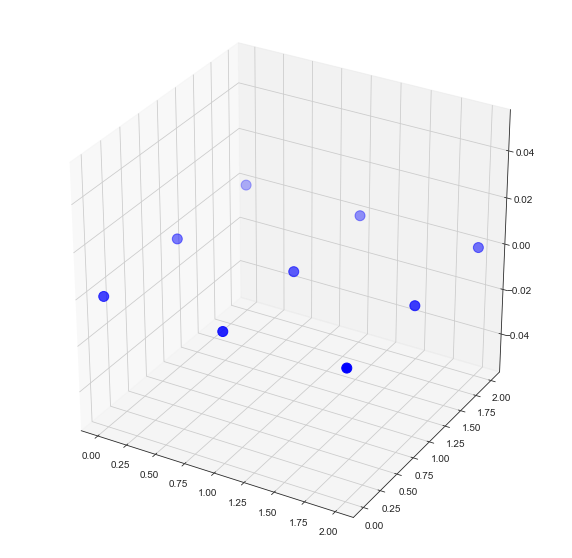

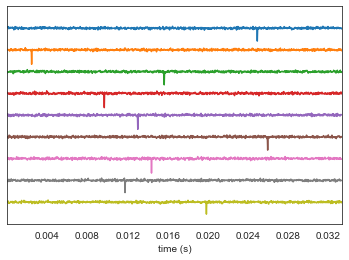

In [3]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(geom[:,0], geom[:,1], geom[:,2], c='blue', s=100);

w_ts_geom = sw.plot_timeseries(recording, trange=[0, 1])

In [4]:
# create strucute containing added padded channels around geom
padded_channels, observed_channels = basilic.utils.make_padded_channels(geom, num_pads = 2)

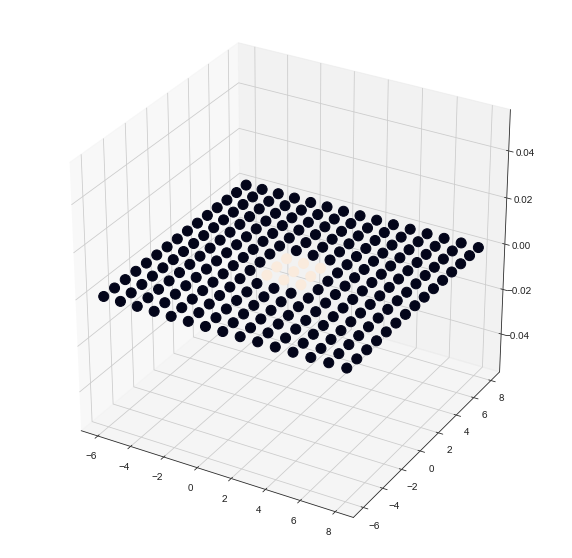

In [5]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(padded_channels[:,0], padded_channels[:,1], c=observed_channels, s=100, alpha=1);

In [6]:
neighbouring_channels = basilic.utils.get_neighbours_channels(padded_channels, observed_channels, spike_channel_radius = 5)

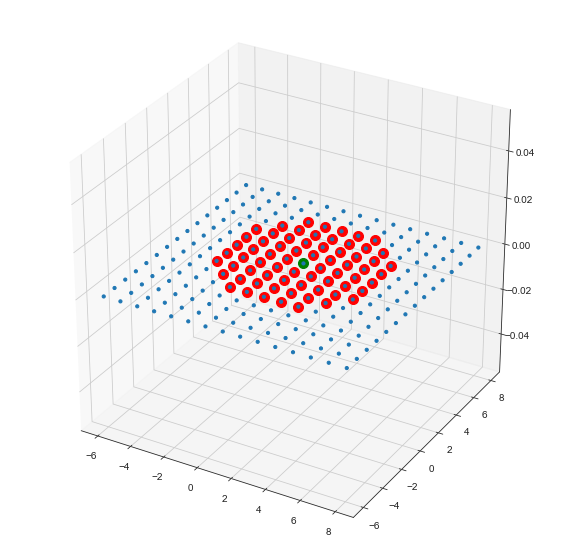

In [7]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(padded_channels[:,0], padded_channels[:,1], s=10, alpha=1);

recorded_channels_ids = [key for key in neighbouring_channels.keys()]

display_rec_channel = recorded_channels_ids[7]
for channel in neighbouring_channels[display_rec_channel]:
    ax.scatter(padded_channels[channel][0], padded_channels[channel][1], c=('g' if channel==display_rec_channel else 'r'), s=100)

In [8]:
waveforms_list, channel_ids_list = basilic.utils.extract_waveforms(recording, spike_frame_channel_array, padded_channels, observed_channels, neighbouring_channels)

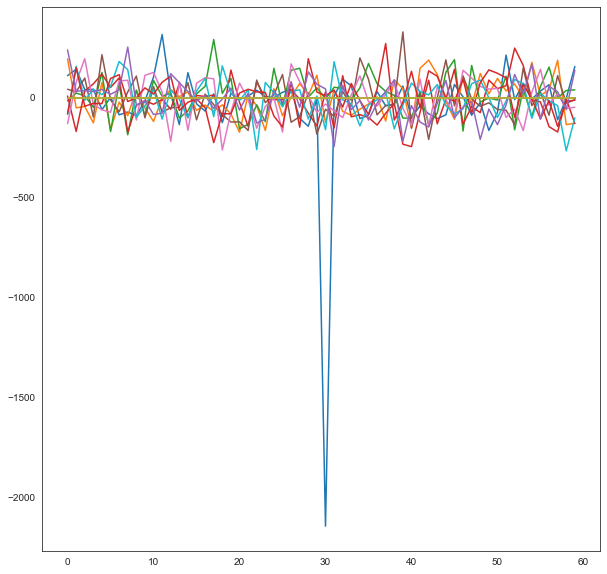

In [9]:
fig = plt.figure(figsize=(10,10))

for waveform in waveforms_list[0]:
       plt.plot(waveform)

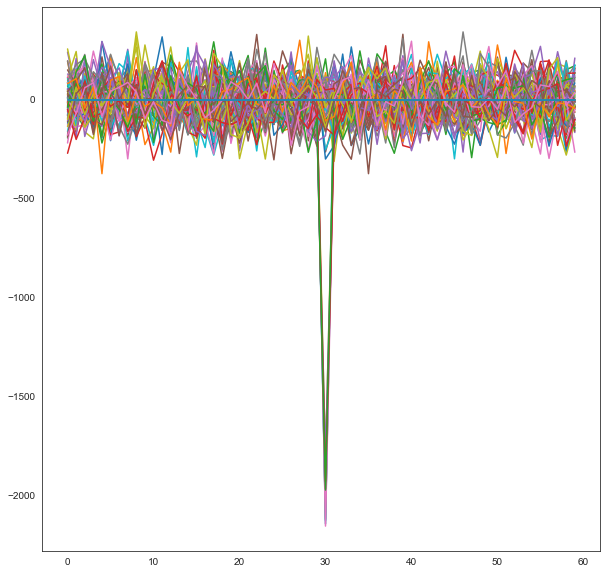

In [10]:
fig = plt.figure(figsize=(10,10))

for waveforms in waveforms_list:
    for waveform in waveforms:
        plt.plot(waveform)